In [2]:
import numpy as np
import pandas as pd

import linmix

import matplotlib.pyplot as plt
%matplotlib inline

from Zoldak.Math.tools import to_log

In [70]:
data = pd.read_csv(('/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
                    'Band_13_GBM+LAT__22_GBMconstrained.txt'), 
                   sep='\t')

data = data[data.trigger.map(lambda x: x != 'bn090510016')]  # remove short burst
data.index = range(0, len(data))

df = pd.DataFrame()
df['eiso'] = data['eiso']/1E52
df['eiso_err'] = data.loc[:, ['eiso_err_low', 'eiso_err_up']].apply(np.mean, 1)
df['eiso_err'] = df['eiso_err']/1E52
df['epeakRest'] = data['epeakRest']
df['epeakRest_err'] = data.loc[:, ['epeakRest_err_low', 'epeakRest_err_up']].apply(np.mean, 1)


x, xsig = to_log(df['eiso'], df['eiso_err'], which='average', errTypeReturn='moe')
y, ysig = to_log(df['epeakRest'], df['epeakRest_err'], which='average', errTypeReturn='moe')

In [19]:
?plt.errorbar

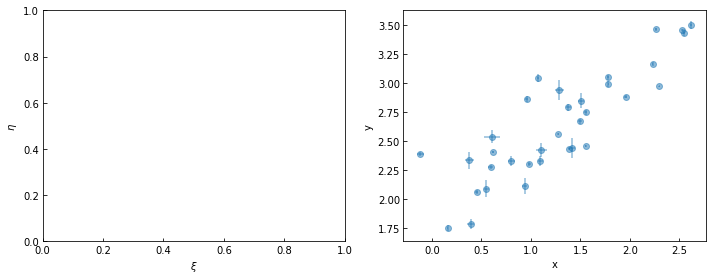

In [18]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
#ax.scatter(xi, eta)
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')
# ax.set_xlim(-6,6)
# ax.set_ylim(-3,4)
ax = fig.add_subplot(122)
ax.scatter(x, y, alpha=0.5)
ax.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
# ax.set_xlim(-10,10)
# ax.set_ylim(-5,6)
# ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
fig.tight_layout()
plt.show()

In [15]:
lm = linmix.LinMix(x=x, y=y, xsig=xerr, ysig=yerr, K=2)
lm.run_mcmc(silent=False)


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00091531 0.99329993 1.01475756 0.99890607 0.99542189 0.99979372]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00598175 1.00202286 1.00591279 0.99861907 0.99790785 0.99579909]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00501175 1.00008649 1.00455644 0.9995224  1.00016776 0.99768405]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00293329 1.00029317 1.00235515 0.99839186 1.0001065  0.99947274]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00006218 1.00010398 1.00106235 0.99992857 1.00045199 0.99962529]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00003198 0.99956035 0


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0000964  1.00019694 1.00009549 1.00006498 0.99990926 1.00036114]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00000884 1.0000947  1.00009584 0.99999938 0.99990986 1.00033808]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00001066 1.00011642 1.00008835 0.99993041 0.9999122  1.00034129]


In [35]:
cols = ['alpha', 'beta', 'sigsqr', 'pi', 'mu', 'tausqr', 'mu0', 'usqr', 'wsqr', 'ximean', 'xisig', 'corr']

In [58]:
[np.percentile(lm.chain[:][col], [50., 16., 84.]) for col in ['alpha', 'beta', 'sigsqr']]

[array([1.92947837, 1.84089794, 2.02117961]),
 array([0.5566896 , 0.49691261, 0.61773202]),
 array([0.06183714, 0.04768052, 0.08169195])]

In [57]:
[np.percentile((lm.chain[:][col]**0.5 if 'sig' in col else lm.chain[:][col]), [50., 16., 84.]) for col in ['alpha', 'beta', 'sigsqr']]

[array([1.92947837, 1.84089794, 2.02117961]),
 array([0.5566896 , 0.49691261, 0.61773202]),
 array([0.24867075, 0.21835868, 0.28581804])]

In [39]:
for col in cols:
    print('%10s: %10.4f'%(col, lm.chain[:][col].mean()))

     alpha:     1.9304
      beta:     0.5569
    sigsqr:     0.0649
        pi:     0.5000
        mu:     1.2864
    tausqr:    56.1068
       mu0:     1.2876
      usqr:     0.3288
      wsqr:     0.5949
    ximean:     1.2760
     xisig:     0.8448
      corr:     0.8544


In [55]:
for col in cols:
    print('%10s: %10.7f'%(col, np.median(lm.chain[:][col])))

     alpha:  1.9294784
      beta:  0.5566896
    sigsqr:  0.0618371
        pi:  0.5000000
        mu:  1.2721740
    tausqr:  0.4813221
       mu0:  1.2850907
      usqr:  0.2954889
      wsqr:  0.4490476
    ximean:  1.2761675
     xisig:  0.7535545
      corr:  0.8611714


In [61]:
alpha = np.percentile(lm.chain[:]['alpha'], 50.)
beta = np.percentile(lm.chain[:]['beta'], 50.)
sigsqr = np.percentile(lm.chain[:]['sigsqr'], 50.)
sig = sigsqr**0.5

<Figure size 432x288 with 0 Axes>

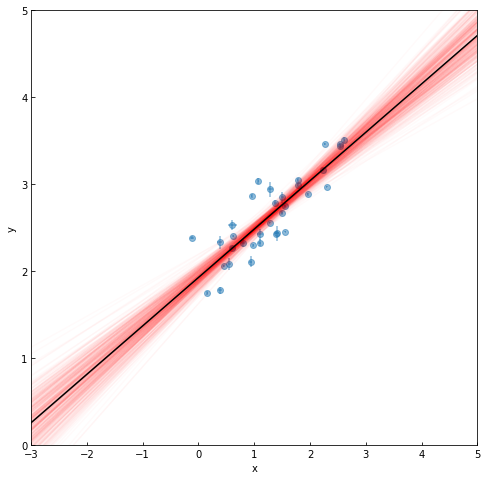

In [68]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(x, y, alpha=0.5)
plt.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(-10,11)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02)
ys = alpha + xs * beta
plt.plot(xs, ys, color='k')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.xlim(-3,5)
plt.ylim(0,5)
plt.show()
# ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
#fig.tight_layout()

In [69]:
print(alpha, beta, sig)

1.9294783679304048 0.5566895950241889 0.2486707547469072
